Karinn Murdock

03/14/2022

# Project Title 

## Introduction

### Research Question and Importance

For my final project, I am exploring the music industry and how it has changed over the years. More specifically, I want to look at how music industry sales have changed in the past 40 years, both in terms of quantity and type of sales (CDs, paid subscription, etc). This topic is important in order to understand how the music industry sales have shifted and how customer preferences have changed. This topic is of interest to me as I'm extremely interested in the music industry and potentially working on the business side of the music industry after graduation. This topic is important to artists and companies within the industry as they must understand the current landscape and how to maximize sales and cater to customer's preferences. 

### Data Source

The data source I will use to explore this question is a dataset on music industry sales over the past 40 years created by the Recording Industry Association of America (RIAA). According to RIAA, this is the most comprehensive data on U.S. recorded music revenues. This dataset goes all the way back to 1973 and lists format of sale, year of sale, and quantity of sale. A link to the dataset can be found here: https://data.world/makeovermonday/2020w21-visualizing-40-years-of-music-industry-sales

### Analysis and Visualizations

I chose this dataset as I intend to analyze how music industry sales have changed since 1973. I intend to analyze whether sales in general have increased or decreased as well as how the format of sales have changed between 1973 and now. For visualizations, I plan to use pie charts to show the breakdown of format of sales for each year. I also plan to create bar charts to show the number of sales each year from 1973 to now. 

## Methods

## Results

In [206]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

In [207]:
df = pd.read_csv('MusicData2.csv')

In [208]:
df.shape

(3008, 5)

The dataset has 5 columns and 3008 rows of data.

In [209]:
df.columns

Index(['Format', 'Metric', 'Year', 'Number of Records', 'Value (Actual)'], dtype='object')

Looking at the first 5 entries:

In [210]:
df.head()

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,NaN
1,CD,Units,1974,1,NaN
2,CD,Units,1975,1,NaN
3,CD,Units,1976,1,NaN
4,CD,Units,1977,1,NaN


Looking at the last 5 entries:

In [211]:
df.tail()

,Format,Metric,Year,Number of Records,Value (Actual)
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197
3007,Vinyl Single,Value (Adjusted),2019,1,6.795946


In [212]:
df.dtypes

Format                object
Metric                object
Year                   int64
Number of Records      int64
Value (Actual)       float64
dtype: object

Finding summary statistics:

In [213]:
df.describe()

,Year,Number of Records,Value (Actual)
count,3008.000000,3008.0,1351.000000
mean,1996.000000,1.0,781.291237
std,13.566915,0.0,2246.837672
min,1973.000000,1.0,-7.650944
25%,1984.000000,1.0,3.700228
50%,1996.000000,1.0,63.900000
75%,2008.000000,1.0,448.900000
max,2019.000000,1.0,19667.327790


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Format             3008 non-null   object 
 1   Metric             3008 non-null   object 
 2   Year               3008 non-null   int64  
 3   Number of Records  3008 non-null   int64  
 4   Value (Actual)     1351 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 117.6+ KB


In [215]:
print(df)

            Format            Metric  Year  Number of Records  Value (Actual)
0               CD             Units  1973                  1             NaN
1               CD             Units  1974                  1             NaN
2               CD             Units  1975                  1             NaN
3               CD             Units  1976                  1             NaN
4               CD             Units  1977                  1             NaN
...            ...               ...   ...                ...             ...
3003  Vinyl Single  Value (Adjusted)  2015                  1        6.205390
3004  Vinyl Single  Value (Adjusted)  2016                  1        5.198931
3005  Vinyl Single  Value (Adjusted)  2017                  1        6.339678
3006  Vinyl Single  Value (Adjusted)  2018                  1        5.386197
3007  Vinyl Single  Value (Adjusted)  2019                  1        6.795946

[3008 rows x 5 columns]


Looking at the data, the column "Value (Actual)" has missing information for many of the data entries. Additionally, it seems some of the data in the "Value (Actual)" column is measuring units sold while other entries are measuring revenue.

### Cleaning the Data

First, I am replacing all NaN values with a zero.

In [216]:
new_df = df.fillna(0)
new_df

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,0.000000
1,CD,Units,1974,1,0.000000
2,CD,Units,1975,1,0.000000
3,CD,Units,1976,1,0.000000
4,CD,Units,1977,1,0.000000
...,...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


In some of the earlier years, certain formats such as CDs hadn't been created yet. I don't want to include these sales formats in my dataset for the years when the value is 0.0 so I am creating a new dataframe with these values removed.

In [217]:
# Creating a dataframe that only has the relevant formats for each year

In [218]:
new_df_no_values_0 = new_df[new_df["Value (Actual)"] != 0.0].reset_index(drop=True)
new_df_no_values_0

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1983,1,0.800000
1,CD,Units,1984,1,5.800000
2,CD,Units,1985,1,22.600000
3,CD,Units,1986,1,53.000000
4,CD,Units,1987,1,102.100000
...,...,...,...,...,...
1269,Vinyl Single,Value (Adjusted),2015,1,6.205390
1270,Vinyl Single,Value (Adjusted),2016,1,5.198931
1271,Vinyl Single,Value (Adjusted),2017,1,6.339678
1272,Vinyl Single,Value (Adjusted),2018,1,5.386197


In [219]:
# There are only 1274 rows as compared to 3008 rows before since some of the rows were irrelevant. 

In [220]:
# creating a dataframe that has the units sold data for each year and format

In [221]:
units = new_df_no_values_0[new_df_no_values_0['Metric'] == 'Units']
units

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1983,1,0.8
1,CD,Units,1984,1,5.8
2,CD,Units,1985,1,22.6
3,CD,Units,1986,1,53.0
4,CD,Units,1987,1,102.1
...,...,...,...,...,...
397,Paid Subscriptions,Units,2014,1,7.7
398,Paid Subscriptions,Units,2015,1,10.8
399,Paid Subscriptions,Units,2016,1,22.7
400,Paid Subscriptions,Units,2017,1,35.3


In [222]:
# creating a dataframe that has the Present Value Revenue data for each year and format

In [274]:
adjusted.dtypes

Format                object
Metric                object
Year                   int64
Number of Records      int64
Value (Actual)       float64
dtype: object

In [223]:
adjusted = new_df_no_values_0[new_df_no_values_0['Metric'] == 'Value (Adjusted)'].reset_index(drop=True)
adjusted

,Format,Metric,Year,Number of Records,Value (Actual)
0,8 - Track,Value (Adjusted),1973,1,2815.681824
1,8 - Track,Value (Adjusted),1974,1,2848.008609
2,8 - Track,Value (Adjusted),1975,1,2770.409498
3,8 - Track,Value (Adjusted),1976,1,3047.215772
4,8 - Track,Value (Adjusted),1977,1,3421.416287
...,...,...,...,...,...
431,Vinyl Single,Value (Adjusted),2015,1,6.205390
432,Vinyl Single,Value (Adjusted),2016,1,5.198931
433,Vinyl Single,Value (Adjusted),2017,1,6.339678
434,Vinyl Single,Value (Adjusted),2018,1,5.386197


In [224]:
# creating a dataframe for Revenue at time of purchase for each year and format

In [225]:
value = new_df_no_values_0[new_df_no_values_0['Metric'] == 'Value'].reset_index(drop=True)
value

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Value,1983,1,17.200000
1,CD,Value,1984,1,103.300000
2,CD,Value,1985,1,389.500000
3,CD,Value,1986,1,930.100000
4,CD,Value,1987,1,1593.600000
...,...,...,...,...,...
431,Vinyl Single,Value,2015,1,5.752954
432,Vinyl Single,Value,2016,1,4.880680
433,Vinyl Single,Value,2017,1,6.078385
434,Vinyl Single,Value,2018,1,5.290337


### Exploratory Data Visualizations

In [226]:
# creating dataframes with the unit sales data for each format 

In [227]:
# step 1: get all unique Format types
unit_format_types = list(set(units["Format"]))
unit_format_types
# step 2: create an empty list to input new data_frames
unit_format_dfs = []
# step 3: create all the new data frames and add to list
for i in np.arange(len(unit_format_types)):
    unit_first_format_type = unit_format_types[i]
    unit_format_df = units[units["Format"] == unit_first_format_type]
    unit_format_dfs.append(unit_format_df)
    #print(format_df.head())

In [228]:
# creating dataframes with the Adjusted Revenue sales data for each format

In [229]:
# step 1: get all unique Format types
format_types = list(set(adjusted["Format"]))
format_types
# step 2: create an empty list to input new data_frames
format_dfs = []
# step 3: create all the new data frames and add to list
for i in np.arange(len(format_types)):
    first_format_type = format_types[i]
    format_df = adjusted[adjusted["Format"] == first_format_type]
    format_dfs.append(format_df)
    #print(format_df.head())

In [263]:
format_dfs[0]

,Format,Metric,Year,Number of Records,Value (Actual)
315,Paid Subscription,Value (Adjusted),2005,1,195.309905
316,Paid Subscription,Value (Adjusted),2006,1,261.490444
317,Paid Subscription,Value (Adjusted),2007,1,288.585326
318,Paid Subscription,Value (Adjusted),2008,1,262.896754
319,Paid Subscription,Value (Adjusted),2009,1,245.722059
320,Paid Subscription,Value (Adjusted),2010,1,249.025694
321,Paid Subscription,Value (Adjusted),2011,1,281.639932
322,Paid Subscription,Value (Adjusted),2012,1,445.276306
323,Paid Subscription,Value (Adjusted),2013,1,706.011657
324,Paid Subscription,Value (Adjusted),2014,1,831.834028


In [231]:
# could be cool to create a drop down menu with these options ....

In [232]:
# plotting Paid Subscription sales over the years

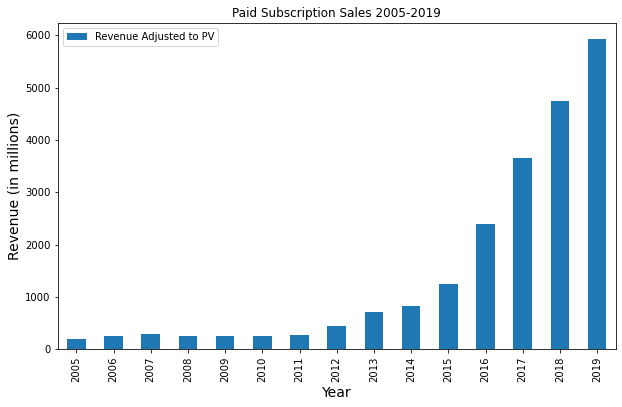

In [233]:
ps = format_dfs[0].plot(kind='bar', x='Year', y='Value (Actual)', figsize=(10,6))

ps.set_title('Paid Subscription Sales 2005-2019')
ps.set_xlabel('Year', fontsize=14)
ps.set_ylabel('Revenue (in millions)', fontsize=14)
ps.legend(['Revenue Adjusted to PV'])

In [234]:
# plotting CD single sales over the years

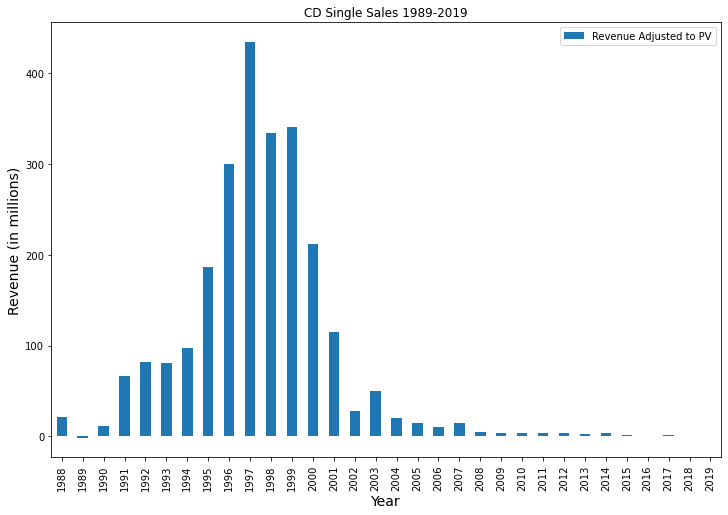

In [235]:
cds = format_dfs[1].plot(kind='bar', x='Year', y='Value (Actual)', figsize=(12,8))

cds.set_title('CD Single Sales 1989-2019')
cds.set_xlabel('Year', fontsize=14)
cds.set_ylabel('Revenue (in millions)', fontsize=14)
cds.legend(['Revenue Adjusted to PV'])

In [236]:
# in years 2016, 2018, and 2019 the values are under 1 million and therefore very close to zero on this graph

In [237]:
# plotting Limited Tier Paid Subscription sales over the years

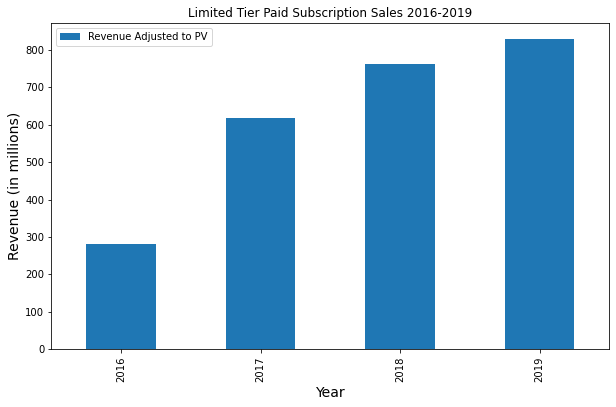

In [238]:
cds = format_dfs[2].plot(kind='bar', x='Year', y='Value (Actual)', figsize=(10,6))

cds.set_title('Limited Tier Paid Subscription Sales 2016-2019')
cds.set_xlabel('Year', fontsize=14)
cds.set_ylabel('Revenue (in millions)', fontsize=14)
cds.legend(['Revenue Adjusted to PV'])

In [239]:
# still need to plot for remaining formats

In [240]:
# looking at how composition of sales changed every 15 years ... could be cool to add an interactive drop down menu

In [241]:
# looking at most popular format of sales in 1973

In [242]:
df_1973 = adjusted[adjusted['Year'] == 1973]

In [243]:
df_1973_index = df_1973.set_index("Format")
df_1973_index

,Metric,Year,Number of Records,Value (Actual)
Format,,,,
8 - Track,Value (Adjusted),1973,1,2815.681824
Cassette,Value (Adjusted),1973,1,437.611081
LP/EP,Value (Adjusted),1973,1,7174.518514
Other Tapes,Value (Adjusted),1973,1,89.825432
Vinyl Single,Value (Adjusted),1973,1,1094.027703


Text(0, 0.5, 'Revenue (in millions)')

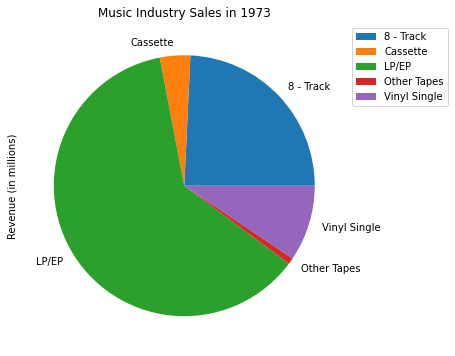

In [244]:
a = df_1973_index.plot(kind='pie', y='Value (Actual)',figsize=(15,6))
plt.legend(bbox_to_anchor=(1.0, 1.0))
a.set_title('Music Industry Sales in 1973')
a.set_ylabel('Revenue (in millions)')

In [245]:
# looking at most popular format of sales in 1988

In [246]:
df_1988 = adjusted[adjusted['Year'] == 1988]
df_1988_index = df_1988.set_index("Format")
df_1988_index

,Metric,Year,Number of Records,Value (Actual)
Format,,,,
CD,Value (Adjusted),1988,1,4516.462927
CD Single,Value (Adjusted),1988,1,21.178686
Cassette,Value (Adjusted),1988,1,7315.507276
Cassette Single,Value (Adjusted),1988,1,123.830483
LP/EP,Value (Adjusted),1988,1,1150.132336
Vinyl Single,Value (Adjusted),1988,1,389.860717


Text(0, 0.5, 'Revenue (in millions)')

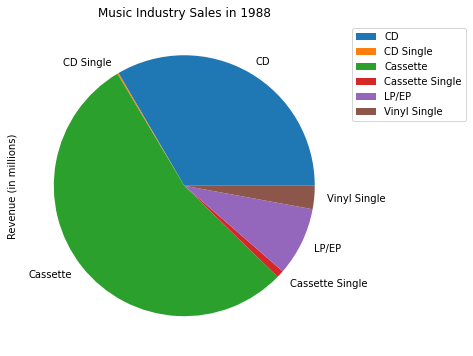

In [247]:
b = df_1988_index.plot(kind='pie', y='Value (Actual)',figsize=(15,6))
plt.legend(bbox_to_anchor=(1.0, 1.0))
b.set_title('Music Industry Sales in 1988')
b.set_ylabel('Revenue (in millions)')

In [248]:
# looking at most popular format of sales in 2003

In [249]:
df_2003 = adjusted[adjusted['Year'] == 2003]
df_2003_index = df_2003.set_index("Format")
df_2003_index

,Metric,Year,Number of Records,Value (Actual)
Format,,,,
CD,Value (Adjusted),2003,1,15607.443020
CD Single,Value (Adjusted),2003,1,50.019848
Cassette,Value (Adjusted),2003,1,150.198487
DVD Audio,Value (Adjusted),2003,1,11.115522
LP/EP,Value (Adjusted),2003,1,30.150853
Music Video (Physical),Value (Adjusted),2003,1,555.637143
SACD,Value (Adjusted),2003,1,36.542278
Vinyl Single,Value (Adjusted),2003,1,29.872965


Text(0, 0.5, 'Revenue (in millions)')

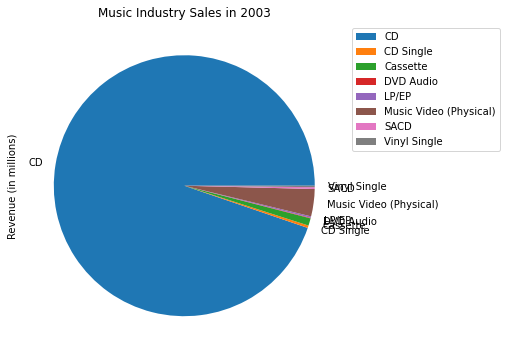

In [250]:
c = df_2003_index.plot(kind='pie', y='Value (Actual)',figsize=(15,6))
plt.legend(bbox_to_anchor=(1.0, 1.0))
c.set_title('Music Industry Sales in 2003')
c.set_ylabel('Revenue (in millions)')

In [251]:
# looking at most popular format of sales in 2018

In [252]:
df_2018 = adjusted[adjusted['Year'] == 2018]
df_2018_index = df_2018.set_index("Format")
df_2018_index

,Metric,Year,Number of Records,Value (Actual)
Format,,,,
CD,Value (Adjusted),2018,1,711.041239
CD Single,Value (Adjusted),2018,1,0.157981
DVD Audio,Value (Adjusted),2018,1,3.377494
Download Album,Value (Adjusted),2018,1,508.704388
Download Music Video,Value (Adjusted),2018,1,2.261051
Download Single,Value (Adjusted),2018,1,499.316974
Kiosk,Value (Adjusted),2018,1,2.000652
LP/EP,Value (Adjusted),2018,1,426.820187
Limited Tier Paid Subscription,Value (Adjusted),2018,1,760.591366


Text(0, 0.5, 'Revenue (in millions)')

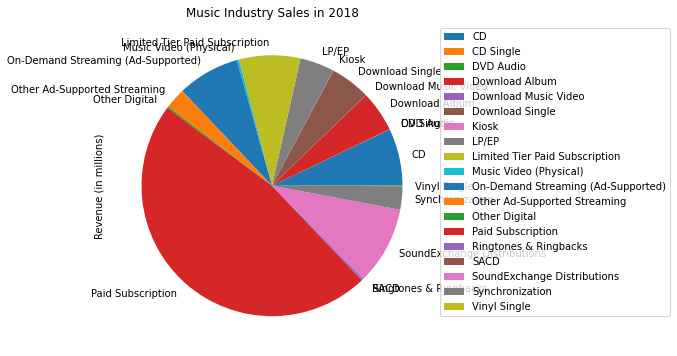

In [253]:
d = df_2018_index.plot(kind='pie', y='Value (Actual)',figsize=(15,6))
plt.legend(bbox_to_anchor=(1.0, 1.0))
d.set_title('Music Industry Sales in 2018')
d.set_ylabel('Revenue (in millions)')

In [254]:
# need to clean up formatting ^

### Looking at Correlation

In [315]:
print(format_dfs[0]['Value (Actual)'].corr(format_dfs[5]['Value (Actual)']))

nan


## Analysis

## Discussion 